<a href="https://colab.research.google.com/github/enbiyacigdem/Urban-Sound-8K---Project-/blob/orkun_branch/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


import librosa as lb 
import IPython.display as ipd



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


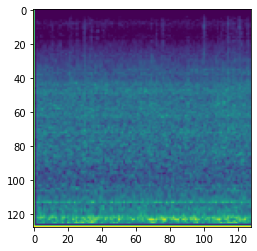

In [3]:
DATADIR = "/content/drive/MyDrive/spectrograms"
CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

IMG_SIZE = 128
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),0)
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
img_array.shape

(128, 128)

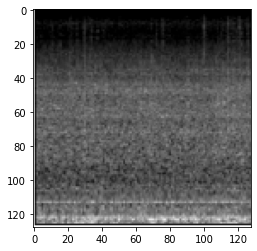

In [5]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), 0)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array = new_array / 255
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()


100%|██████████| 1000/1000 [00:08<00:00, 122.41it/s]


In [7]:
new_array

array([[255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,  36, 133, ..., 155, 146, 125],
       [255,  27,  28, ...,  28,  28,  28],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

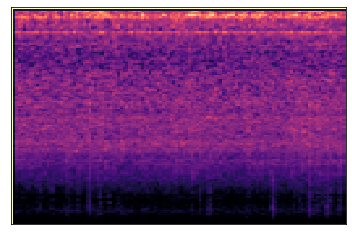

In [8]:
import librosa.display
img = librosa.display.specshow(new_array)
print(img)

In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

8
0
4
2
3
9
4
0
7
5


In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    

In [13]:
X.shape

(8732, 128, 128, 1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


y = np.array(y)
y.shape

(8732,)

In [16]:
#train  test split
from sklearn.model_selection import train_test_split

# create a validation data 10%
X_train, X_validate, y_train, y_validate = train_test_split(X,y, test_size= 0.1)


# create a test - training data
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,
                                                    test_size = 0.33)

In [17]:
X_test.shape, y_test.shape, y_train.shape

((2594, 128, 128, 1), (2594,), (5264,))

In [18]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer = "adam", 
              metrics = ["accuracy"])








In [19]:
results = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 150, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

Epoch 1/150
42/42 [==============================] - 55s 1s/step - loss: 1.7360 - accuracy: 0.3670 - val_loss: 1.2903 - val_accuracy: 0.5316
Epoch 2/150
42/42 [==============================] - 52s 1s/step - loss: 1.2153 - accuracy: 0.5750 - val_loss: 1.0978 - val_accuracy: 0.6349
Epoch 3/150
42/42 [==============================] - 52s 1s/step - loss: 1.0647 - accuracy: 0.6318 - val_loss: 0.9740 - val_accuracy: 0.6600
Epoch 4/150
42/42 [==============================] - 52s 1s/step - loss: 0.9505 - accuracy: 0.6744 - val_loss: 0.9241 - val_accuracy: 0.6816
Epoch 5/150
42/42 [==============================] - 56s 1s/step - loss: 0.8871 - accuracy: 0.7016 - val_loss: 0.8695 - val_accuracy: 0.7309
Epoch 6/150
42/42 [==============================] - 52s 1s/step - loss: 0.8102 - accuracy: 0.7320 - val_loss: 0.7713 - val_accuracy: 0.7633
Epoch 7/150
42/42 [==============================] - 53s 1s/step - loss: 0.7290 - accuracy: 0.7585 - val_loss: 0.7161 - val_accuracy: 0.7845
Epoch 8/150
4

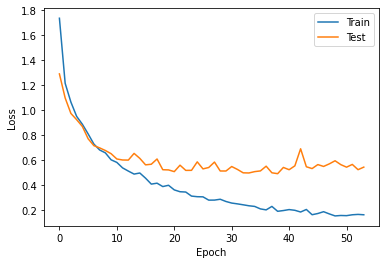

In [20]:

# Plot the the training loss
plt.plot(results.history["loss"], label="Train")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Test")
# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [21]:
# Evaluate the performance
test_result = model.test_on_batch(X_test, y_test)
# Print the result
print(test_result)

[0.5442695021629333, 0.8619892001152039]


In [22]:
prediction = model.predict(X_validate)
print(model.evaluate(X_validate, y_validate))

28/28 [==============================] - 2s 89ms/step - loss: 0.6301 - accuracy: 0.8490
[0.6300819516181946, 0.8489702343940735]


In [23]:
predictions = np.argmax(prediction,axis=1)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_validate, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       106
           1       0.95      0.85      0.90        47
           2       0.84      0.61      0.71        88
           3       0.75      0.87      0.81       102
           4       0.87      0.84      0.85        94
           5       0.82      0.89      0.85       100
           6       1.00      0.93      0.97        45
           7       0.91      0.96      0.93       112
           8       0.88      0.85      0.87        95
           9       0.79      0.81      0.80        85

    accuracy                           0.85       874
   macro avg       0.86      0.85      0.85       874
weighted avg       0.85      0.85      0.85       874



In [25]:
print(confusion_matrix(y_validate,predictions))

[[ 92   0   2   0   0   7   0   1   0   4]
 [  0  40   1   0   3   0   0   0   0   3]
 [  4   0  54  13   1   3   0   1   7   5]
 [  3   0   3  89   1   3   0   0   2   1]
 [  2   1   0   6  79   1   0   4   0   1]
 [  4   0   1   3   1  89   0   2   0   0]
 [  1   0   0   1   0   0  42   0   0   1]
 [  1   0   0   0   3   1   0 107   0   0]
 [  3   0   0   3   1   4   0   0  81   3]
 [  1   1   3   4   2   1   0   2   2  69]]


In [38]:
print(f"The prediction is : {predictions[153]}, and actual value is : {y_validate[153]}")

print(f"The prediction is : {predictions[1]}, and actual value is : {y_validate[1]}")

The prediction is : 9, and actual value is : 9
The prediction is : 4, and actual value is : 4
